In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib
import os
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [13]:
df = pd.read_csv("2022-06-08-enriched.csv")
pd.set_option("display.max_columns", None)
df

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,CVE-2009-0563,microsoft,Office,Microsoft Office Buffer Overflow Vulnerability,2022-06-08,Microsoft Office contains a buffer overflow vu...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2009-06-10,NaN,CWE-119,NaN,NaN,NaN
770,CVE-2009-0557,microsoft,Office,Microsoft Office Object Record Corruption Vuln...,2022-06-08,Microsoft Office contains an object record cor...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2009-06-10,NaN,CWE-94,NaN,NaN,NaN
771,CVE-2008-0655,adobe,Acrobat and Reader,Adobe Acrobat and Reader Unspecified Vulnerabi...,2022-06-08,Adobe Acrobat and Reader contains an unespecif...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2008-02-07,NaN,NVD-CWE-noinfo,NaN,NaN,NaN
772,CVE-2007-5659,adobe,Acrobat and Reader,Adobe Acrobat and Reader Buffer Overflow Vulne...,2022-06-08,Adobe Acrobat and Reader contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2008-02-12,NaN,CWE-119,NaN,NaN,NaN


In [14]:
df.isnull().sum()*100/len(df)

cve_id                  0.000000
vendor_project          0.000000
product                 0.129199
vulnerability_name      0.000000
date_added              0.000000
short_description       0.775194
required_action         0.000000
due_date                0.000000
notes                 100.000000
grp                     0.000000
pub_date                1.162791
cvss                   21.317829
cwe                     1.808786
vector                 21.317829
complexity             21.317829
severity               21.317829
dtype: float64

In [15]:
# Drop the 'notes' column
df = df.drop('notes', axis=1)

In [16]:

def handling_nullvalues(df):
    
    #list of null value columns
    null_cols = list(df.columns[df.isna().any()])
    
    #iterating through the cols to replace the null value with the mode
    for col in null_cols:
        mode=df[col].value_counts().index[0]
        df[col].fillna(mode,inplace=True) #df[col] = df[col].fillna("not available")
    return df
handling_nullvalues(df)

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,CVE-2009-0563,microsoft,Office,Microsoft Office Buffer Overflow Vulnerability,2022-06-08,Microsoft Office contains a buffer overflow vu...,Apply updates per vendor instructions.,2022-06-22,37,2009-06-10,9.8,CWE-119,NETWORK,LOW,HIGH
770,CVE-2009-0557,microsoft,Office,Microsoft Office Object Record Corruption Vuln...,2022-06-08,Microsoft Office contains an object record cor...,Apply updates per vendor instructions.,2022-06-22,37,2009-06-10,9.8,CWE-94,NETWORK,LOW,HIGH
771,CVE-2008-0655,adobe,Acrobat and Reader,Adobe Acrobat and Reader Unspecified Vulnerabi...,2022-06-08,Adobe Acrobat and Reader contains an unespecif...,Apply updates per vendor instructions.,2022-06-22,37,2008-02-07,9.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH
772,CVE-2007-5659,adobe,Acrobat and Reader,Adobe Acrobat and Reader Buffer Overflow Vulne...,2022-06-08,Adobe Acrobat and Reader contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,37,2008-02-12,9.8,CWE-119,NETWORK,LOW,HIGH


In [17]:
df.isnull().sum()*100/len(df)

cve_id                0.0
vendor_project        0.0
product               0.0
vulnerability_name    0.0
date_added            0.0
short_description     0.0
required_action       0.0
due_date              0.0
grp                   0.0
pub_date              0.0
cvss                  0.0
cwe                   0.0
vector                0.0
complexity            0.0
severity              0.0
dtype: float64

In [18]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [19]:
def datatypescheck(df):
    numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
    discrete_feature=[feature for feature in numerical_feature if df[feature].dtypes == 'int64']
    continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
    categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
    print("Numerical Features Count {}".format(len(numerical_feature)))
    print("Discrete feature Count {}".format(len(discrete_feature)))
    print("Continuous feature Count {}".format(len(continuous_feature)))
    print("Categorical feature Count {}".format(len(categorical_feature)))
    print("Numerical features:",numerical_feature)
    print("discrete_features:",discrete_feature)
    print("continuous_features:",continuous_feature)
    print("categorical_features:",categorical_feature)
    return numerical_feature,discrete_feature,continuous_feature,categorical_feature

In [20]:
numerical_feature,discrete_feature,continuous_feature,categorical_feature=datatypescheck(df)

Numerical Features Count 2
Discrete feature Count 1
Continuous feature Count 1
Categorical feature Count 13
Numerical features: ['grp', 'cvss']
discrete_features: ['grp']
continuous_features: ['cvss']
categorical_features: ['cve_id', 'vendor_project', 'product', 'vulnerability_name', 'date_added', 'short_description', 'required_action', 'due_date', 'pub_date', 'cwe', 'vector', 'complexity', 'severity']


C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


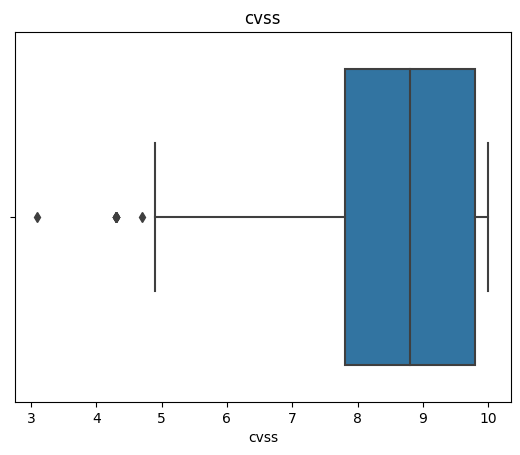

<Figure size 1500x1500 with 0 Axes>

In [21]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [22]:
def removeoutlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
    print(lower_bridge, upper_bridge)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [23]:
for feature in continuous_feature:
    print(feature)
    removeoutlier(df,feature)

cvss
4.799999999999999 12.800000000000002


C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


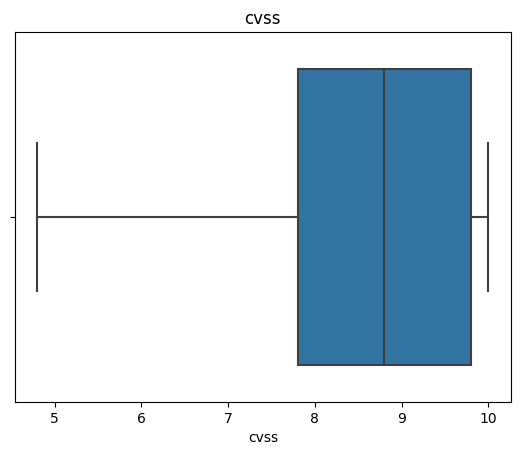

<Figure size 1500x1500 with 0 Axes>

In [24]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [27]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_feature:
    df[feature] = label_encoder.fit_transform(df[feature])

# Now, the categorical features in df are label enco
df

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,637,0,79,4,0,158,0,6,1,382,9.8,61,2,1,0
1,635,0,79,4,0,160,0,6,1,382,7.8,61,1,1,1
2,634,0,79,5,0,159,0,6,1,382,9.8,72,2,1,0
3,636,0,79,6,0,161,0,6,1,382,9.8,74,2,1,0
4,594,1,4,9,0,162,0,6,1,380,8.8,63,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,11,57,191,336,36,444,0,45,37,12,9.8,0,2,1,1
770,10,57,191,341,36,449,0,45,37,12,9.8,75,2,1,1
771,7,1,4,14,36,170,0,45,37,6,9.8,79,2,1,1
772,6,1,4,7,36,166,0,45,37,7,9.8,0,2,1,1


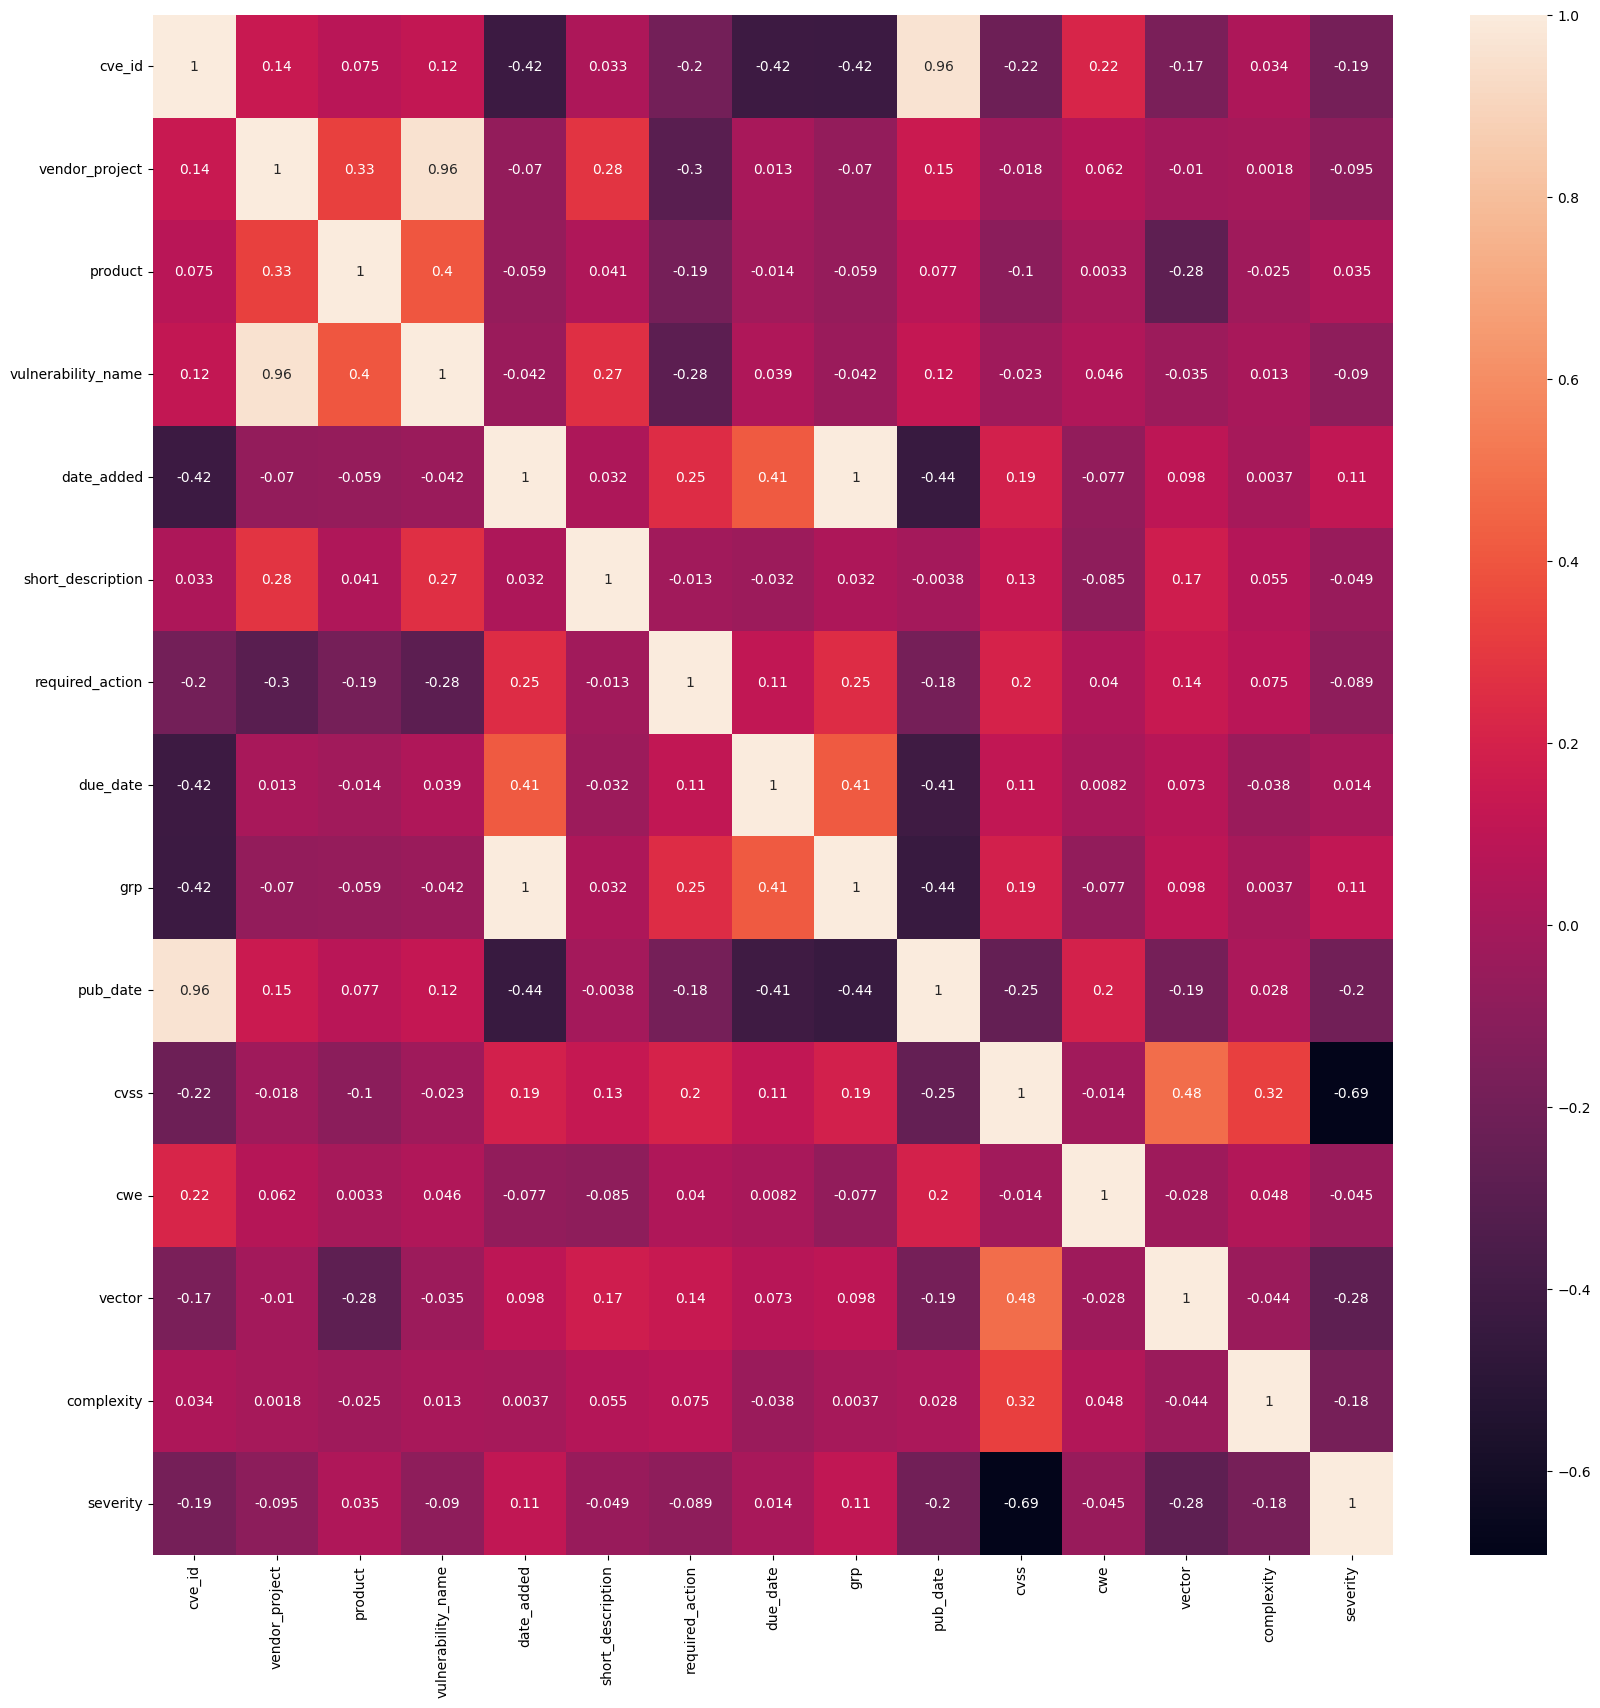

In [29]:
corrmat = df.corr(method = "spearman")
#print(corrmat.round(2))
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

<Axes: xlabel='severity', ylabel='count'>

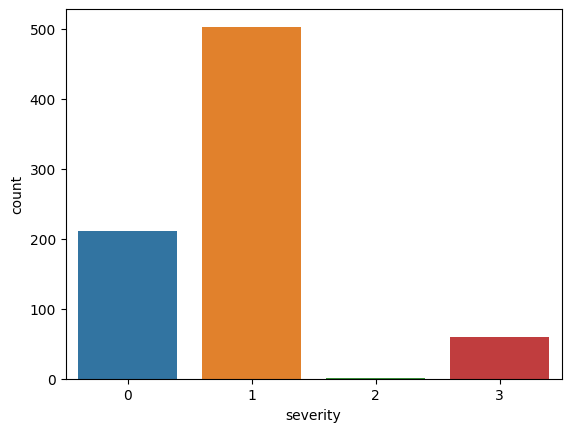

In [30]:
sns.countplot(df["severity"])

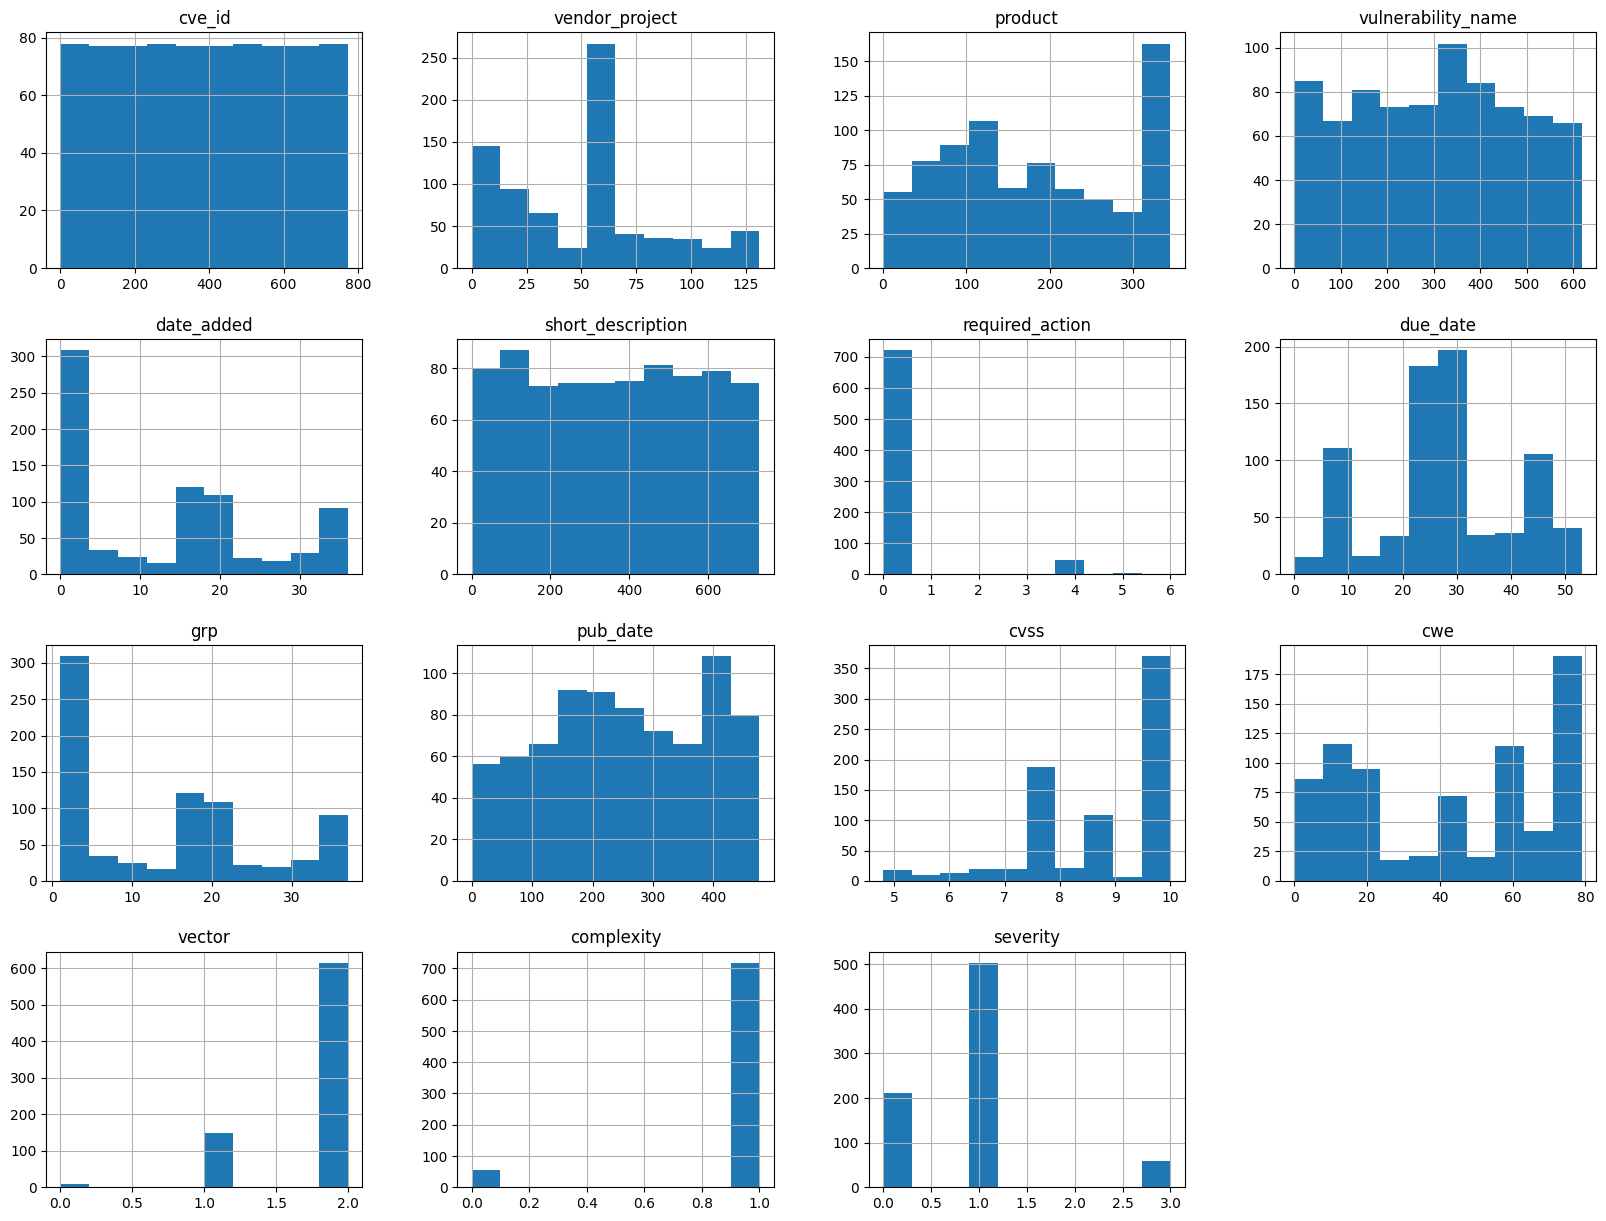

In [31]:
# Histogram for numeric variables
df.hist(figsize=(20, 15))
plt.show()

In [32]:
df.to_csv("preprocesseddiabitic.csv", index=False)

In [33]:
X = df.drop(["severity"], axis=1)
Y = df["severity"]

### splitting data

In [35]:
# Assuming X and Y are your features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Traget class sampling

In [36]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({1: 403, 0: 169, 3: 47})
The number of classes after fit Counter({1: 403, 0: 403, 3: 403})


In [37]:
accuracylis=[]


### Catboostclassfier

In [38]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.044479
0:	total: 132ms	remaining: 4m 23s
1:	total: 137ms	remaining: 2m 16s
2:	total: 140ms	remaining: 1m 33s
3:	total: 150ms	remaining: 1m 14s
4:	total: 154ms	remaining: 1m 1s
5:	total: 158ms	remaining: 52.5s
6:	total: 164ms	remaining: 46.6s
7:	total: 168ms	remaining: 41.7s
8:	total: 172ms	remaining: 38s
9:	total: 175ms	remaining: 34.9s
10:	total: 181ms	remaining: 32.7s
11:	total: 185ms	remaining: 30.6s
12:	total: 189ms	remaining: 28.9s
13:	total: 197ms	remaining: 27.9s
14:	total: 203ms	remaining: 26.8s
15:	total: 209ms	remaining: 25.9s
16:	total: 213ms	remaining: 24.9s
17:	total: 217ms	remaining: 23.9s
18:	total: 220ms	remaining: 22.9s
19:	total: 225ms	remaining: 22.3s
20:	total: 228ms	remaining: 21.5s
21:	total: 232ms	remaining: 20.8s
22:	total: 235ms	remaining: 20.2s
23:	total: 238ms	remaining: 19.6s
24:	total: 243ms	remaining: 19.2s
25:	total: 247ms	remaining: 18.7s
26:	total: 250ms	remaining: 18.3s
27:	total: 254ms	remaining: 17.9s
28:	total: 259ms	remaining

280:	total: 1.19s	remaining: 7.31s
281:	total: 1.2s	remaining: 7.3s
282:	total: 1.2s	remaining: 7.29s
283:	total: 1.21s	remaining: 7.29s
284:	total: 1.21s	remaining: 7.28s
285:	total: 1.21s	remaining: 7.27s
286:	total: 1.22s	remaining: 7.26s
287:	total: 1.22s	remaining: 7.25s
288:	total: 1.22s	remaining: 7.25s
289:	total: 1.23s	remaining: 7.24s
290:	total: 1.23s	remaining: 7.23s
291:	total: 1.23s	remaining: 7.22s
292:	total: 1.24s	remaining: 7.21s
293:	total: 1.24s	remaining: 7.2s
294:	total: 1.25s	remaining: 7.2s
295:	total: 1.25s	remaining: 7.19s
296:	total: 1.25s	remaining: 7.2s
297:	total: 1.26s	remaining: 7.2s
298:	total: 1.27s	remaining: 7.21s
299:	total: 1.27s	remaining: 7.22s
300:	total: 1.28s	remaining: 7.22s
301:	total: 1.28s	remaining: 7.22s
302:	total: 1.29s	remaining: 7.21s
303:	total: 1.29s	remaining: 7.21s
304:	total: 1.3s	remaining: 7.21s
305:	total: 1.3s	remaining: 7.2s
306:	total: 1.3s	remaining: 7.19s
307:	total: 1.31s	remaining: 7.18s
308:	total: 1.31s	remaining: 7.

542:	total: 2.18s	remaining: 5.86s
543:	total: 2.19s	remaining: 5.85s
544:	total: 2.19s	remaining: 5.85s
545:	total: 2.19s	remaining: 5.84s
546:	total: 2.2s	remaining: 5.84s
547:	total: 2.2s	remaining: 5.83s
548:	total: 2.2s	remaining: 5.83s
549:	total: 2.21s	remaining: 5.82s
550:	total: 2.21s	remaining: 5.82s
551:	total: 2.21s	remaining: 5.81s
552:	total: 2.22s	remaining: 5.8s
553:	total: 2.22s	remaining: 5.8s
554:	total: 2.23s	remaining: 5.79s
555:	total: 2.23s	remaining: 5.79s
556:	total: 2.23s	remaining: 5.78s
557:	total: 2.23s	remaining: 5.78s
558:	total: 2.24s	remaining: 5.77s
559:	total: 2.24s	remaining: 5.77s
560:	total: 2.25s	remaining: 5.76s
561:	total: 2.25s	remaining: 5.76s
562:	total: 2.25s	remaining: 5.75s
563:	total: 2.26s	remaining: 5.75s
564:	total: 2.26s	remaining: 5.74s
565:	total: 2.26s	remaining: 5.74s
566:	total: 2.27s	remaining: 5.73s
567:	total: 2.27s	remaining: 5.73s
568:	total: 2.27s	remaining: 5.72s
569:	total: 2.28s	remaining: 5.72s
570:	total: 2.28s	remaini

820:	total: 3.2s	remaining: 4.59s
821:	total: 3.2s	remaining: 4.59s
822:	total: 3.2s	remaining: 4.58s
823:	total: 3.21s	remaining: 4.58s
824:	total: 3.21s	remaining: 4.57s
825:	total: 3.21s	remaining: 4.57s
826:	total: 3.22s	remaining: 4.57s
827:	total: 3.22s	remaining: 4.56s
828:	total: 3.23s	remaining: 4.56s
829:	total: 3.23s	remaining: 4.55s
830:	total: 3.23s	remaining: 4.55s
831:	total: 3.24s	remaining: 4.54s
832:	total: 3.24s	remaining: 4.54s
833:	total: 3.24s	remaining: 4.54s
834:	total: 3.25s	remaining: 4.53s
835:	total: 3.25s	remaining: 4.53s
836:	total: 3.25s	remaining: 4.52s
837:	total: 3.26s	remaining: 4.52s
838:	total: 3.26s	remaining: 4.51s
839:	total: 3.26s	remaining: 4.51s
840:	total: 3.27s	remaining: 4.5s
841:	total: 3.27s	remaining: 4.5s
842:	total: 3.28s	remaining: 4.5s
843:	total: 3.28s	remaining: 4.49s
844:	total: 3.28s	remaining: 4.49s
845:	total: 3.29s	remaining: 4.48s
846:	total: 3.29s	remaining: 4.48s
847:	total: 3.29s	remaining: 4.47s
848:	total: 3.3s	remaining

1085:	total: 4.17s	remaining: 3.51s
1086:	total: 4.18s	remaining: 3.51s
1087:	total: 4.18s	remaining: 3.5s
1088:	total: 4.19s	remaining: 3.5s
1089:	total: 4.19s	remaining: 3.5s
1090:	total: 4.2s	remaining: 3.5s
1091:	total: 4.2s	remaining: 3.49s
1092:	total: 4.2s	remaining: 3.49s
1093:	total: 4.21s	remaining: 3.48s
1094:	total: 4.21s	remaining: 3.48s
1095:	total: 4.21s	remaining: 3.48s
1096:	total: 4.22s	remaining: 3.47s
1097:	total: 4.22s	remaining: 3.47s
1098:	total: 4.22s	remaining: 3.46s
1099:	total: 4.23s	remaining: 3.46s
1100:	total: 4.23s	remaining: 3.46s
1101:	total: 4.23s	remaining: 3.45s
1102:	total: 4.24s	remaining: 3.45s
1103:	total: 4.24s	remaining: 3.44s
1104:	total: 4.24s	remaining: 3.44s
1105:	total: 4.25s	remaining: 3.43s
1106:	total: 4.25s	remaining: 3.43s
1107:	total: 4.25s	remaining: 3.42s
1108:	total: 4.26s	remaining: 3.42s
1109:	total: 4.26s	remaining: 3.42s
1110:	total: 4.26s	remaining: 3.41s
1111:	total: 4.27s	remaining: 3.41s
1112:	total: 4.27s	remaining: 3.4s


1359:	total: 5.17s	remaining: 2.43s
1360:	total: 5.18s	remaining: 2.43s
1361:	total: 5.18s	remaining: 2.43s
1362:	total: 5.19s	remaining: 2.43s
1363:	total: 5.2s	remaining: 2.42s
1364:	total: 5.21s	remaining: 2.42s
1365:	total: 5.21s	remaining: 2.42s
1366:	total: 5.22s	remaining: 2.42s
1367:	total: 5.23s	remaining: 2.42s
1368:	total: 5.23s	remaining: 2.41s
1369:	total: 5.24s	remaining: 2.41s
1370:	total: 5.24s	remaining: 2.4s
1371:	total: 5.24s	remaining: 2.4s
1372:	total: 5.25s	remaining: 2.4s
1373:	total: 5.25s	remaining: 2.39s
1374:	total: 5.25s	remaining: 2.39s
1375:	total: 5.26s	remaining: 2.38s
1376:	total: 5.26s	remaining: 2.38s
1377:	total: 5.26s	remaining: 2.38s
1378:	total: 5.27s	remaining: 2.37s
1379:	total: 5.27s	remaining: 2.37s
1380:	total: 5.28s	remaining: 2.37s
1381:	total: 5.28s	remaining: 2.36s
1382:	total: 5.28s	remaining: 2.36s
1383:	total: 5.29s	remaining: 2.35s
1384:	total: 5.29s	remaining: 2.35s
1385:	total: 5.29s	remaining: 2.34s
1386:	total: 5.3s	remaining: 2.3

1647:	total: 6.17s	remaining: 1.32s
1648:	total: 6.17s	remaining: 1.31s
1649:	total: 6.18s	remaining: 1.31s
1650:	total: 6.18s	remaining: 1.31s
1651:	total: 6.18s	remaining: 1.3s
1652:	total: 6.19s	remaining: 1.3s
1653:	total: 6.19s	remaining: 1.29s
1654:	total: 6.19s	remaining: 1.29s
1655:	total: 6.2s	remaining: 1.29s
1656:	total: 6.2s	remaining: 1.28s
1657:	total: 6.2s	remaining: 1.28s
1658:	total: 6.21s	remaining: 1.28s
1659:	total: 6.21s	remaining: 1.27s
1660:	total: 6.21s	remaining: 1.27s
1661:	total: 6.22s	remaining: 1.26s
1662:	total: 6.22s	remaining: 1.26s
1663:	total: 6.22s	remaining: 1.26s
1664:	total: 6.23s	remaining: 1.25s
1665:	total: 6.23s	remaining: 1.25s
1666:	total: 6.24s	remaining: 1.25s
1667:	total: 6.24s	remaining: 1.24s
1668:	total: 6.24s	remaining: 1.24s
1669:	total: 6.25s	remaining: 1.23s
1670:	total: 6.25s	remaining: 1.23s
1671:	total: 6.25s	remaining: 1.23s
1672:	total: 6.25s	remaining: 1.22s
1673:	total: 6.26s	remaining: 1.22s
1674:	total: 6.26s	remaining: 1.2

1910:	total: 7.16s	remaining: 333ms
1911:	total: 7.16s	remaining: 330ms
1912:	total: 7.16s	remaining: 326ms
1913:	total: 7.17s	remaining: 322ms
1914:	total: 7.17s	remaining: 318ms
1915:	total: 7.17s	remaining: 315ms
1916:	total: 7.18s	remaining: 311ms
1917:	total: 7.18s	remaining: 307ms
1918:	total: 7.19s	remaining: 303ms
1919:	total: 7.19s	remaining: 300ms
1920:	total: 7.2s	remaining: 296ms
1921:	total: 7.2s	remaining: 292ms
1922:	total: 7.2s	remaining: 288ms
1923:	total: 7.21s	remaining: 285ms
1924:	total: 7.21s	remaining: 281ms
1925:	total: 7.21s	remaining: 277ms
1926:	total: 7.22s	remaining: 273ms
1927:	total: 7.22s	remaining: 270ms
1928:	total: 7.23s	remaining: 266ms
1929:	total: 7.23s	remaining: 262ms
1930:	total: 7.23s	remaining: 258ms
1931:	total: 7.24s	remaining: 255ms
1932:	total: 7.24s	remaining: 251ms
1933:	total: 7.24s	remaining: 247ms
1934:	total: 7.25s	remaining: 243ms
1935:	total: 7.25s	remaining: 240ms
1936:	total: 7.26s	remaining: 236ms
1937:	total: 7.26s	remaining: 2

In [39]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracylis.append(accuracy_score(y_test,y_pred))

[[ 42   0   0   0]
 [  0 100   0   0]
 [  0   0   0   1]
 [  0   0   0  12]]
0.9935483870967742
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00       100
           2       0.00      0.00      0.00         1
           3       0.92      1.00      0.96        12

    accuracy                           0.99       155
   macro avg       0.73      0.75      0.74       155
weighted avg       0.99      0.99      0.99       155



C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForestClassifier

In [40]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [41]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
accuracylis.append(accuracy_score(y_test,y_pred1))

[[ 42   0   0   0]
 [  0 100   0   0]
 [  0   0   0   1]
 [  0   0   0  12]]
0.9935483870967742
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00       100
           2       0.00      0.00      0.00         1
           3       0.92      1.00      0.96        12

    accuracy                           0.99       155
   macro avg       0.73      0.75      0.74       155
weighted avg       0.99      0.99      0.99       155



C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LogisticRegression

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
accuracylis.append(accuracy_score(y_test,y_pred2))

[[27 13  0  2]
 [34 52  0 14]
 [ 0  0  0  1]
 [ 1  3  0  8]]
0.5612903225806452
              precision    recall  f1-score   support

           0       0.44      0.64      0.52        42
           1       0.76      0.52      0.62       100
           2       0.00      0.00      0.00         1
           3       0.32      0.67      0.43        12

    accuracy                           0.56       155
   macro avg       0.38      0.46      0.39       155
weighted avg       0.64      0.56      0.57       155



C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GaussianNB

In [44]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [45]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
accuracylis.append(accuracy_score(y_test,y_pred3))

[[40  2  0  0]
 [19 65  0 16]
 [ 0  0  0  1]
 [ 0  0  0 12]]
0.7548387096774194
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        42
           1       0.97      0.65      0.78       100
           2       0.00      0.00      0.00         1
           3       0.41      1.00      0.59        12

    accuracy                           0.75       155
   macro avg       0.52      0.65      0.54       155
weighted avg       0.84      0.75      0.76       155



C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [47]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
accuracylis.append(accuracy_score(y_test,y_pred4))

[[19 12  0 11]
 [24 64  0 12]
 [ 0  0  0  1]
 [ 3  5  0  4]]
0.5612903225806452
              precision    recall  f1-score   support

           0       0.41      0.45      0.43        42
           1       0.79      0.64      0.71       100
           2       0.00      0.00      0.00         1
           3       0.14      0.33      0.20        12

    accuracy                           0.56       155
   macro avg       0.34      0.36      0.33       155
weighted avg       0.63      0.56      0.59       155



C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### feedforward neural network

In [49]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple feedforward neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test_scaled, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")
accuracylis.append(accuracy)

Epoch 1/10
20/20 [==============================] - 1s 8ms/step - loss: 0.5960 - accuracy: 0.5670 - val_loss: 0.4301 - val_accuracy: 0.6323
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.6527 - val_loss: 0.1763 - val_accuracy: 0.6516
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.6769 - val_loss: -0.1192 - val_accuracy: 0.7097
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: -0.2764 - accuracy: 0.7496 - val_loss: -0.5084 - val_accuracy: 0.7484
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: -0.7387 - accuracy: 0.7981 - val_loss: -1.0518 - val_accuracy: 0.8194
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: -1.3772 - accuracy: 0.8223 - val_loss: -1.8128 - val_accuracy: 0.8258
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: -2.2361 - accuracy: 0.8384 - val_loss: -2.8355 - val_accuracy: 0.8258
Epoch 8/10


### 1D CNN

In [50]:
# Reshape data to have a single channel (assuming you have 1D data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build a simple 1D CNN
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test_reshaped, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")
accuracylis.append(accuracy)

Epoch 1/10
20/20 [==============================] - 1s 8ms/step - loss: 0.2847 - accuracy: 0.6268 - val_loss: 0.0136 - val_accuracy: 0.6452
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: -0.1959 - accuracy: 0.6543 - val_loss: -0.5002 - val_accuracy: 0.7226
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: -0.7955 - accuracy: 0.7658 - val_loss: -1.2048 - val_accuracy: 0.7484
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: -1.6612 - accuracy: 0.7609 - val_loss: -2.3382 - val_accuracy: 0.7806
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: -2.9744 - accuracy: 0.7803 - val_loss: -3.8453 - val_accuracy: 0.7871
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: -4.9810 - accuracy: 0.7997 - val_loss: -6.0940 - val_accuracy: 0.7548
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: -7.7264 - accuracy: 0.7738 - val_loss: -9.1968 - val_accuracy: 0.8000
Epoch 8/

In [ ]:
### comparing models

In [51]:
accuracylis

[0.9935483870967742,
 0.9935483870967742,
 0.5612903225806452,
 0.7548387096774194,
 0.5612903225806452,
 0.8322580456733704,
 0.7870967984199524]

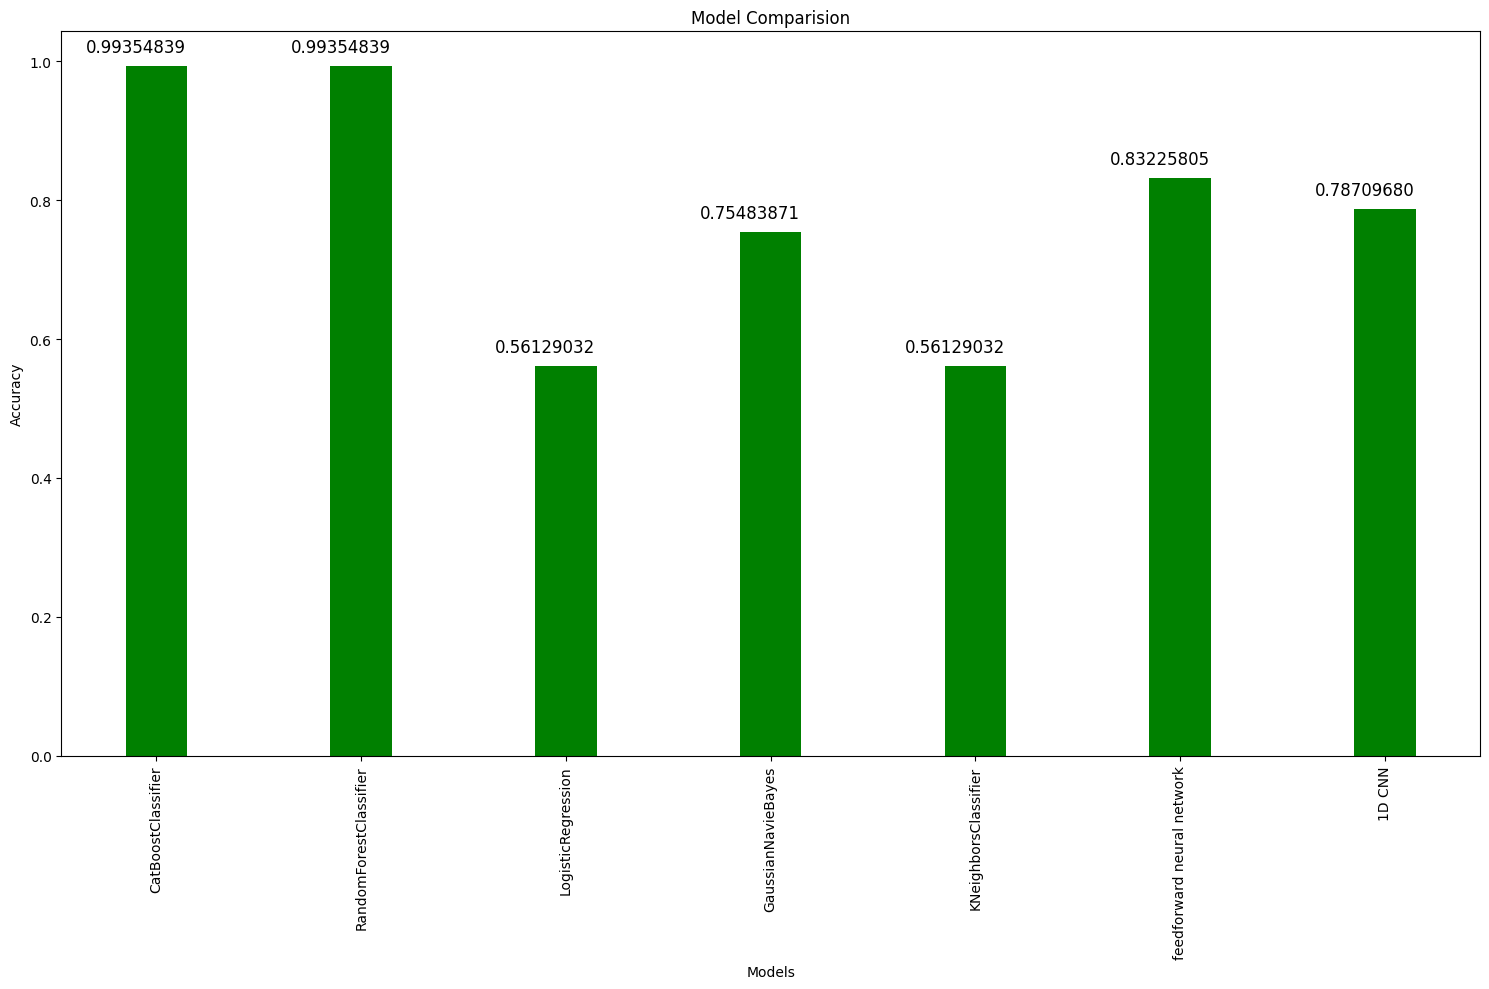

In [52]:
models=['CatBoostClassifier','RandomForestClassifier','LogisticRegression','GaussianNavieBayes','KNeighborsClassifier','feedforward neural network','1D CNN']
fig=plt.figure(figsize=(15,10))
bars=plt.bar(models,accuracylis,color='g',width=0.3)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparision')
plt.xticks(rotation=90)

# Add values above each bar
for bar, score in zip(bars,accuracylis):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.8f}', ha='center', color='black', fontsize=12)

plt.tight_layout()  # Ensure labels are not cut off
plt.show()